# Descriptive Analyses

Intro tables to give context to the data
1. Distribution of affirmation rates for both rumours

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style("whitegrid",{'axes.spines.left' : False,
                           'axes.spines.right': False,
                           'axes.spines.top': False,
                           'grid.linestyle': ':'})
sns.set_context("talk")
participants = pd.read_csv("../data/processed/mock_data/participant-schema.csv",index_col=0)
posts = pd.read_csv("../data/processed/mock_data/posts-schema.csv",index_col=0)
posts

,PROLIFIC_ID,STUDY_ID,SESSION_ID,treatment,secondsTaken,rumour,rumourId,evidence,code,mockGender,timestamp,warning,reshared
id,,,,,,,,,,,,,
1,1,1,1,True,93.87,R1,R1-1,high,questions,Female,57,False,True
1,1,1,1,True,93.87,R2,R2-1,low,questions,Female,9,False,True
1,1,1,1,True,93.87,R1,R1-2,high,affirms,Male,48,False,True
1,1,1,1,True,93.87,R2,R2-2,low,affirms,Female,21,True,False
1,1,1,1,True,93.87,R1,R1-3,high,affirms,Male,23,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,499,1,499,False,93.32,R2,R2-8,low,neutral,Male,43,False,True
499,499,1,499,False,93.32,R1,R1-9,high,questions,Male,1,False,True
499,499,1,499,False,93.32,R2,R2-9,low,affirms,Female,2,False,False


## Initial Tables

1. Participant statistics
2. Experiment descriptive statistics

### Participant statistics

In [2]:
from tableone import TableOne
table_one = TableOne(participants.reset_index().drop(["id",
                                                      "PROLIFIC_ID",
                                                      "STUDY_ID",
                                                      "SESSION_ID"],
                                                     axis=1))
table_one

Missing      Overall
n                                                                           395
age, mean (SD)                                                   0  83.5 (38.6)
educationLevel, n (%)                     communityCollege      61    41 (12.3)
                                          doctorate                   57 (17.1)
                                          graduateSchool              53 (15.9)
                                          highSchool                  49 (14.7)
                                          none                        44 (13.2)
                                          secondary                   52 (15.6)
                                          undergrad                   38 (11.4)
politicalAffiliation, n (%)               centre                32    61 (16.8)
                                          centreLeft                  57 (15.7)
                                          centreRight                 67 (18.5)
                                          left                        70 (19.3)
                                          none                        54 (14.9)
                                          right                       54 (14.9)
attendsProtests, mean (SD)                                       8    0.5 (0.5)
gender_female, mean (SD)                                         0    0.3 (0.5)
gender_intersex, mean (SD)                                       0    0.3 (0.5)
gender_male, mean (SD)                                           0    0.3 (0.5)
gender_nonBinary, mean (SD)                                      0    0.3 (0.4)
gender_transgender, mean (SD)                                    0    0.3 (0.4)
affiliatedMovements_climate, mean (SD)                           0    0.2 (0.4)
affiliatedMovements_gender, mean (SD)                            0    0.2 (0.4)
affiliatedMovements_indigenous, mean (SD)                        0    0.2 (0.4)
affiliatedMovements_labour, mean (SD)                            0    0.2 (0.4)
affiliatedMovements_none, mean (SD)                              0    0.2 (0.4)
affiliatedMovements_race, mean (SD)                              0    0.2 (0.4)
affiliatedMovements_religion, mean (SD)                          0    0.2 (0.4)
socialMedias_facebook, mean (SD)                                 0    0.2 (0.4)
socialMedias_instagram, mean (SD)                                0    0.2 (0.4)
socialMedias_none, mean (SD)                                     0    0.2 (0.4)
socialMedias_reddit, mean (SD)                                   0    0.3 (0.4)
socialMedias_snapchat, mean (SD)                                 0    0.2 (0.4)
socialMedias_tiktok, mean (SD)                                   0    0.2 (0.4)
socialMedias_twitter, mean (SD)                                  0    0.2 (0.4)

### Experiment descriptive statistics

In [3]:
table_two = TableOne(posts.reset_index().drop(["id","PROLIFIC_ID","STUDY_ID","SESSION_ID","rumour","evidence","code","rumourId"],
                                              axis=1),
                     groupby="treatment",
                     pval=True)
table_two

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Grouped by treatment                                                
                                            Missing      Overall         False         True P-Value
n                                                           7900          3860         4040        
secondsTaken, mean (SD)                           0  90.2 (14.5)   89.6 (14.0)  90.7 (14.9)   0.001
mockGender, n (%)       Female                    0  3924 (49.7)   1891 (49.0)  2033 (50.3)   0.246
                        Male                         3976 (50.3)   1969 (51.0)  2007 (49.7)        
timestamp, mean (SD)                              0  29.7 (17.1)   29.6 (17.1)  29.9 (17.0)   0.393
warning, n (%)          False                     0  7541 (95.5)  3860 (100.0)  3681 (91.1)  <0.001
                        True                           359 (4.5)                  359 (8.9)        
reshared, n (%)         False                     0  3872 (49.0)   1922 (49.8)  1950 (48.3)   0.182
                        True                         4028 (51.0)   1938 (50.2)  2090 (51.7)

## Sample Visualizations

## Hypothesis Testing


The presence of credibility indicators in the system will:

- $H_1$: *decrease* the *affirmation rate* for rumours with lower evidence levels.
- $H_2$: *increase* the *denial rate* for rumours with lower evidence levels.
- $H_3$: *increase* the *affirmation rate* for rumours with higher evidence levels.
- $H_4$: *decrease* the *denial rate* for rumours with higher evidence levels.

**Two-/Three-way ANOVA**

- check if there exists statistically significant differences in the reshare rates in the treatment in control groups (by evidence level and post-code)
- To simplify limit results to analysis of affirmations (most important for the rumour framework)

Done following [this](https://www.reneshbedre.com/blog/anova.html) tutorial

**Some visualizations**

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


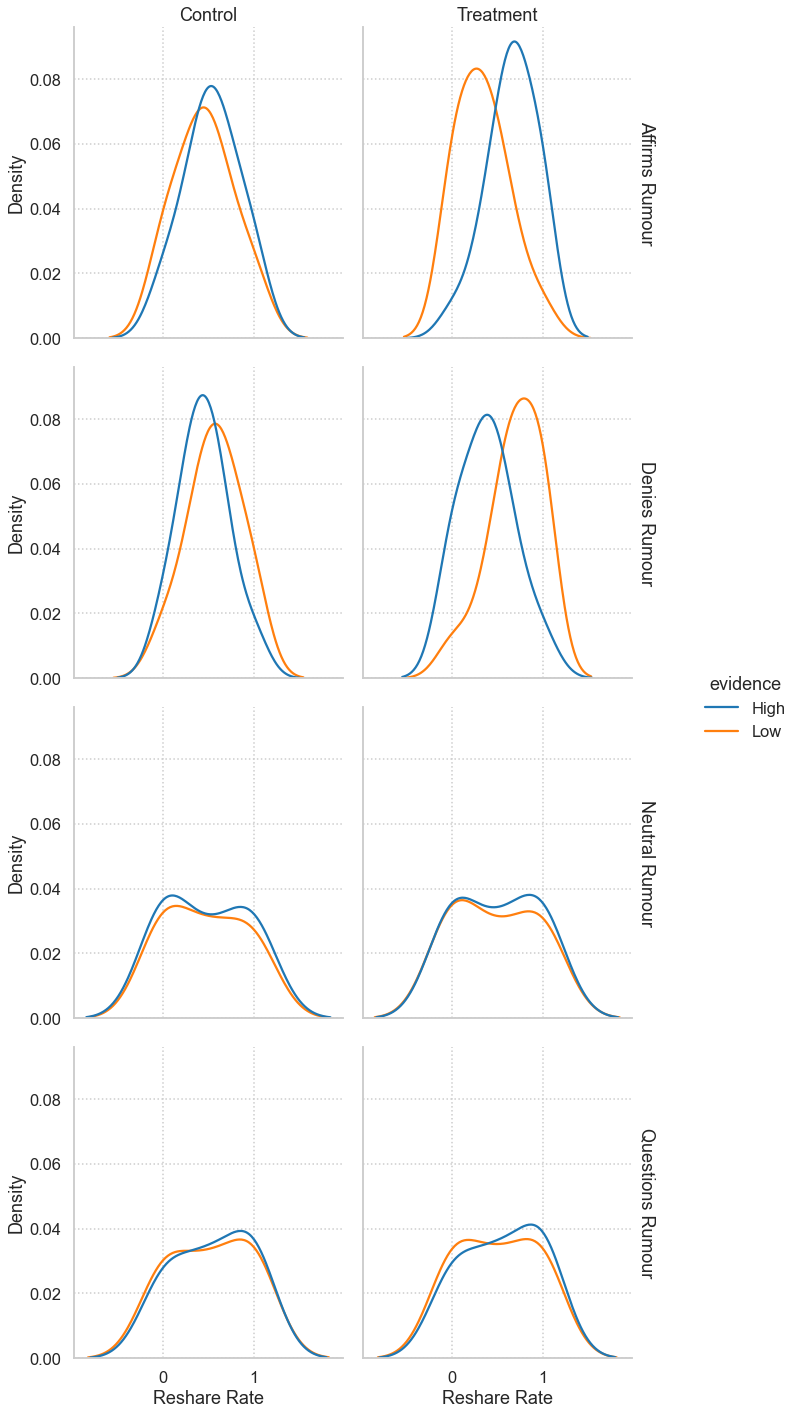

In [11]:
group_cols = ["PROLIFIC_ID","treatment","evidence","code"]
reshare_rates = pd.DataFrame(posts.groupby(group_cols)["reshared"].sum() / posts.groupby(group_cols)["reshared"].count()).reset_index()
# Nicely format labels
reshare_rates['treatment'] = reshare_rates['treatment'].replace({False: 'Control',
                                                                 True: 'Treatment'})
sorting_dict = {'Control': 0, 
                'Treatment': 1, 
                'Affirms': 0,
                'Denies': 1,
                'Neutral': 2,
                'Questions': 3}
reshare_rates['code'] = reshare_rates['code'].str.title()
reshare_rates["evidence"] = reshare_rates["evidence"].str.title()
reshare_rates = reshare_rates.sort_values(by=['treatment','code'],key=lambda x: x.map(sorting_dict))
g = sns.displot(data=reshare_rates, 
            x="reshared",
            hue="evidence",
            col="treatment",
            row="code",
            bw_adjust=1.8,
            facet_kws={"margin_titles":True},
            kind="kde")
g.set_titles(col_template="{col_name}", row_template="{row_name} Rumour")
g.set_axis_labels(x_var="Reshare Rate")
g.fig.savefig("../figures/descriptive_analysis/reshare_rate-hist.pdf")

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


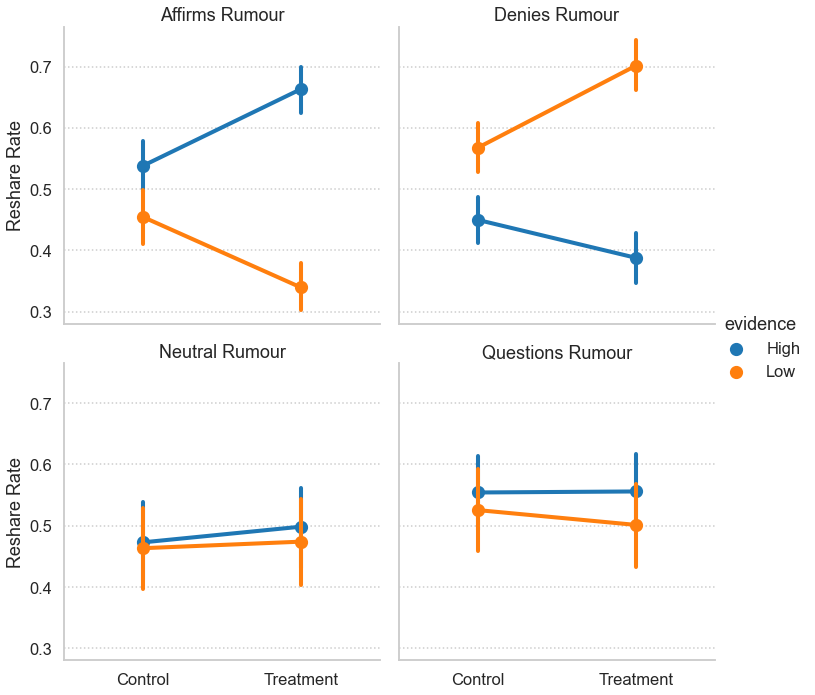

In [12]:
g = sns.catplot(data=reshare_rates, 
            x="treatment",
            y="reshared",
            hue="evidence",
            col="code",
            col_wrap=2,
            margin_titles=True,
            kind="point")
g.set_titles(col_template="{col_name} Rumour",)
g.set_axis_labels(y_var="Reshare Rate",x_var="")
g.savefig("../figures/descriptive_analysis/reshare_rate-point_plot.pdf")

In [13]:
from pingouin import mixed_anova
affirmation_rates = reshare_rates[reshare_rates["code"]=="Affirms"]
affirmation_rates.mixed_anova(dv='reshared',
                              between='treatment',
                              within='evidence',
                              subject='PROLIFIC_ID')

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,treatment,0.005078,1,389,0.005078,0.055366,8.140994e-01,0.000142,NaN
1,evidence,8.285629,1,389,8.285629,111.786957,3.901406e-23,0.223223,1.0
2,Interaction,2.796507,1,389,2.796507,37.729541,2.009712e-09,0.088416,NaN


### TENTATIVE (NOT SURE IF THIS IS THE BEST WAY TO GO)
#### Multiple pairwise comparisons (Post-hoc test)

Now, we know that treatment, evidence and the code show statistically significant differences, but ANOVA does not tell which pairs are significantly different from each other. To know the pairs of significant different treatment, evidence and code, perform multiple pairwise comparison (Post-hoc comparison) analysis using pair-wise T-test.

In [21]:
t = affirmation_rates.groupby("PROLIFIC_ID")["code"].count()
prolific_ids = t[t != 2].index

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
from pingouin import mixed_anova

affirmation_rates[~affirmation_rates["PROLIFIC_ID"].isin(prolific_ids)].pairwise_ttests(dv='reshared',
                              between='treatment',
                              within='evidence',
                              subject='PROLIFIC_ID')

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/pingouin/utils.py:370: DeprecationWarning: NotImplemented should not be used in a boolean context
  x = list(filter(None.__ne__, x))
/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/pingouin/utils.py:370: DeprecationWarning: NotImplemented should not be used in a boolean context
  x = list(filter(None.__ne__, x))
/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/pingouin/utils.py:370: DeprecationWarning: NotImplemented should not be used in a boolean c

,Contrast,evidence,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,evidence,-,High,Low,True,True,9.915541,382.000000,two-sided,8.971809e-21,4.255e+17,0.713848
1,treatment,-,Control,Treatment,False,True,-0.251694,374.592887,two-sided,8.014154e-01,0.117,-0.025720
2,evidence * treatment,High,Control,Treatment,False,True,-4.222704,374.955380,two-sided,3.032883e-05,523.149,-0.431477
3,evidence * treatment,Low,Control,Treatment,False,True,3.638092,374.655550,two-sided,3.131609e-04,61.28,0.371763


### OLDER /SAFER
#### Multiple pairwise comparisons (Post-hoc test)

*This doesn't take into account that evidence is a within subjects factor*

Now, we know that treatment, evidence and the code show statistically significant differences, but ANOVA does not tell which pairs of triads are significantly different from each other. To know the pairs of significant different treatment, evidence and code, perform multiple pairwise comparison (Post-hoc comparison) analysis using Tukey’s HSD test.

In [23]:
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=affirmation_rates, res_var='reshared', xfac_var=['evidence','treatment'],anova_model='reshared ~ C(treatment)*C(evidence)')
res.tukey_summary.sort_values(["Diff","group1","group2"],ascending=False).head(10)

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/patsy/constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping


,group1,group2,Diff,Lower,Upper,q-value,p-value
4,"(High, Treatment)","(Low, Treatment)",0.323856,0.249245,0.398467,15.804502,0.001000
3,"(High, Treatment)","(Low, Control)",0.208979,0.133482,0.284476,10.078815,0.001000
2,"(High, Control)","(Low, Treatment)",0.198912,0.123625,0.274198,9.620020,0.001000
0,"(High, Control)","(High, Treatment)",0.124944,0.049751,0.200138,6.050212,0.001000
5,"(Low, Control)","(Low, Treatment)",0.114877,0.039287,0.190466,5.533573,0.001000
1,"(High, Control)","(Low, Control)",0.084035,0.007871,0.160199,4.017379,0.023854


#### Test ANOVA assumptions

Similar to one-way ANOVA, you can use visual approaches, Bartlett’s or Levene’s, and Shapiro-Wilk test to validate the assumption of normal distribution of residuals.

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


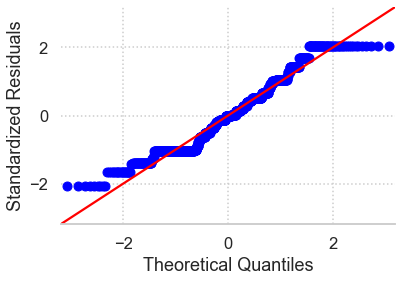

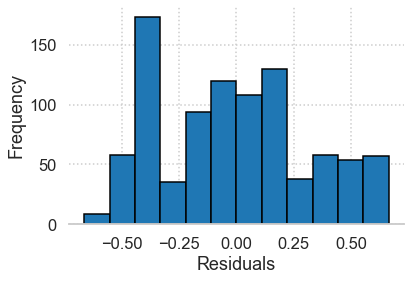

In [30]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()